In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import os
import collections
import pylab

## Contents of notebook:

**Part 1: Load and plot projected water and sediment discharge through 2100**
- Outputs from each climate model are imported into the notebook
- Dataframes are cleaned up so to perform calculations
- Data are reshaped to obtain mean annual water and sediment discharge
- Data are plotted 

**Part 2: Calculate average water and sediment discharge and annual sediment discharge for each time period**
- Summary statistic csv files are imported into the notebook
- Averages for water discharge, SSC, sediment discharge, and annual sediment discharge are taken over each climate model to get one value per time period

**Part 3: Compare and contrast sediment discharge values calculated via different methods**
- Method 1: Sum method (manual averaging)
- Method 2: Sediment rating curve method

# Part 1: Load and plot projected water and sediment discharge through 2100

## 1.1. Import ASCII Data

### 1.1a) GFDL-ESM2M

In [2]:
gfdl_csv = pd.read_csv('../../setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/ASCII_data.csv', dtype=float)
gfdl = pd.DataFrame(gfdl_csv)

In [3]:
gfdl.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,884.0,0.633,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,18.95458,0.00000
1,884.0,0.194,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.09977,0.00002
2,884.0,0.351,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,18.58487,0.00003
3,884.0,0.389,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.00126,0.00000
4,884.0,0.480,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.29840,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,884.0,0.313,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,26.29060,0.00000
32846,884.0,0.471,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,25.68444,0.00000
32847,884.0,0.464,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,25.66434,0.00000
32848,884.0,0.462,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,25.77581,0.00000


### 1.1b) HadGEM2

In [4]:
hadgem_csv = pd.read_csv('../../setup/run_2/Ganga/rcp8p5/HadGEM2/ASCII_data.csv', dtype=float)
hadgem = pd.DataFrame(hadgem_csv)
hadgem.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,884.0,0.030,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.44541,0.00021
1,884.0,0.013,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,15.92587,0.00018
2,884.0,0.020,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.23024,0.00013
3,884.0,0.021,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.76201,0.00014
4,884.0,0.024,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.68083,0.00020
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,884.0,0.006,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,24.19656,0.00003
32846,884.0,0.005,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,24.70480,0.00003
32847,884.0,0.004,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,24.48985,0.00003
32848,884.0,0.004,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,24.56562,0.00002


### 1.1c) IPSL_CM5A

In [5]:
ipsl_csv = pd.read_csv('../../setup/run_2/Ganga/rcp8p5/IPSL_CM5A/ASCII_data.csv', dtype=float)
ipsl = pd.DataFrame(ipsl_csv)
ipsl.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,884.000,0.096,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,20.83517,0.00001
1,884.000,0.037,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.72757,0.00001
2,884.000,0.059,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.14813,0.00000
3,884.000,0.065,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.02479,0.00001
4,884.000,0.077,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.14188,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,884.070,0.005,18.555,0.0,0.0,0.0,0.0,0.846,1152.102,0.908,26.24919,0.00000
32846,884.067,0.006,18.555,0.0,0.0,0.0,0.0,0.846,1152.101,0.908,26.40173,0.00000
32847,884.055,0.009,18.555,0.0,0.0,0.0,0.0,0.846,1152.097,0.908,25.70099,0.00010
32848,884.045,0.005,18.555,0.0,0.0,0.0,0.0,0.845,1152.093,0.908,25.38007,0.00024


### 1.1d) MIROC-ESM-CHEM

In [6]:
miroc_csv = pd.read_csv('../../setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/ASCII_data.csv', dtype=float)
miroc = pd.DataFrame(miroc_csv)
miroc.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,884.000,0.867,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.50126,0.00000
1,884.000,0.251,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,17.11341,0.00000
2,884.000,0.466,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,17.15154,0.00000
3,884.000,0.520,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,17.40840,0.00000
4,884.000,0.648,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,17.32056,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,884.072,0.135,18.555,0.0,0.0,0.0,0.0,0.846,1152.103,0.908,25.48277,0.00002
32846,884.062,0.104,18.555,0.0,0.0,0.0,0.0,0.846,1152.099,0.908,25.74483,0.00008
32847,884.052,0.063,18.555,0.0,0.0,0.0,0.0,0.846,1152.096,0.908,25.68557,0.00000
32848,884.041,0.062,18.554,0.0,0.0,0.0,0.0,0.845,1152.092,0.908,25.80346,0.00000


### 1.1e) NORESM-M

In [7]:
noresm_csv = pd.read_csv('../../setup/run_2/Ganga/rcp8p5/NORESM-M/ASCII_data.csv', dtype=float)
noresm = pd.DataFrame(noresm_csv)
noresm.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,884.000,0.270,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.62540,0.00006
1,884.000,0.093,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.21523,0.00000
2,884.000,0.158,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,16.85114,0.00000
3,884.000,0.174,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,18.00125,0.00000
4,884.000,0.210,18.554,0.0,0.0,0.0,0.0,0.845,1152.078,0.908,19.22165,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,884.217,0.096,18.558,0.0,0.0,0.0,0.0,0.846,1152.152,0.908,21.06268,0.00004
32846,884.160,0.074,18.557,0.0,0.0,0.0,0.0,0.846,1152.132,0.908,21.58401,0.00011
32847,884.104,0.045,18.556,0.0,0.0,0.0,0.0,0.846,1152.113,0.908,21.51235,0.00006
32848,884.047,0.044,18.555,0.0,0.0,0.0,0.0,0.846,1152.094,0.908,21.13448,0.00005


## 1.2. Reshape Qw arrays

In [8]:
# 90 rows by 365 columns = 90 years of output data
gfdl_qw = np.array(gfdl['Qw(m3/s)'])
gfdl_qw_reshape = gfdl_qw.reshape(90,365)
gfdl_qw_mean_rows = np.mean(gfdl_qw_reshape, axis = 1)

hadgem_qw = np.array(hadgem['Qw(m3/s)'])
hadgem_qw_reshape = hadgem_qw.reshape(90,365)
hadgem_qw_mean_rows = np.mean(hadgem_qw_reshape, axis = 1)

ipsl_qw = np.array(ipsl['Qw(m3/s)'])
ipsl_qw_reshape = ipsl_qw.reshape(90,365)
ipsl_qw_mean_rows = np.mean(ipsl_qw_reshape, axis = 1)

miroc_qw = np.array(miroc['Qw(m3/s)'])
miroc_qw_reshape = miroc_qw.reshape(90,365)
miroc_qw_mean_rows = np.mean(miroc_qw_reshape, axis = 1)

noresm_qw = np.array(noresm['Qw(m3/s)'])
noresm_qw_reshape = noresm_qw.reshape(90,365)
noresm_qw_mean_rows = np.mean(noresm_qw_reshape, axis = 1)

## 1.3. Plot Qw outputs
### 1.3a) Colot plot with NO trendline

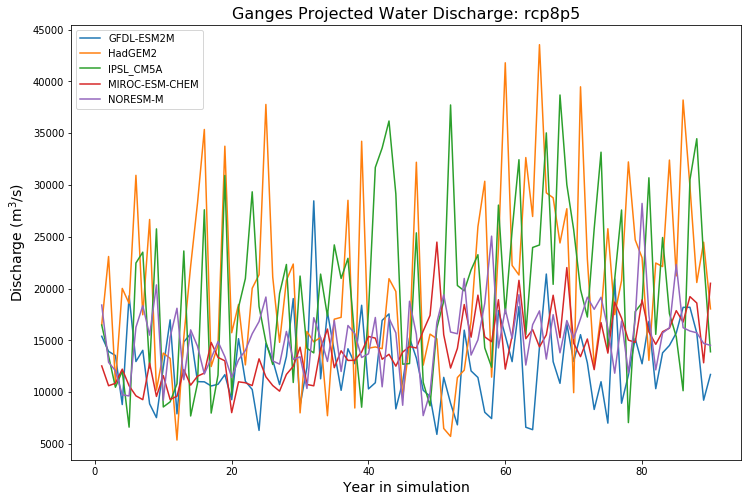

In [9]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qw_mean_rows, color = 'tab:orange', label = 'HadGEM2')
plt.plot(years, ipsl_qw_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_qw_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qw_mean_rows, color = 'tab:purple', label = 'NORESM-M')
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Ganges Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/ganga_qw_rcp8p5_notrend_color.png')

### 1.3b) Calculate trendlines

In [10]:
# calc the trendline for gfdl
z_gfdl = np.polyfit(years, gfdl_qw_mean_rows, 1)
p_gfdl = np.poly1d(z_gfdl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_gfdl[0],z_gfdl[1]), '(GFDL-ESM2M)')

# calc the trendline for hadgem
z_hadgem = np.polyfit(years, hadgem_qw_mean_rows, 1)
p_hadgem = np.poly1d(z_hadgem)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_hadgem[0],z_hadgem[1]), '(HadGEM2)')

# calc the trendline for ipsl
z_ipsl = np.polyfit(years, ipsl_qw_mean_rows, 1)
p_ipsl = np.poly1d(z_ipsl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_ipsl[0],z_ipsl[1]), '(IPSL_CM5A)')

# calc the trendline for miroc
z_miroc = np.polyfit(years, miroc_qw_mean_rows, 1)
p_miroc = np.poly1d(z_miroc)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_miroc[0],z_miroc[1]), '(MIROC-ESM-CHEM)')

# calc the trendline for noresm
z_noresm = np.polyfit(years, noresm_qw_mean_rows, 1)
p_noresm = np.poly1d(z_noresm)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_noresm[0],z_noresm[1]), '(NORESM-M)')

y=9.6x+(12401.1) (GFDL-ESM2M)
y=86.2x+(16701.2) (HadGEM2)
y=97.3x+(15435.8) (IPSL_CM5A)
y=83.1x+(10425.4) (MIROC-ESM-CHEM)
y=38.3x+(13617.0) (NORESM-M)


### 1.3c) Color plot WITH trendlines

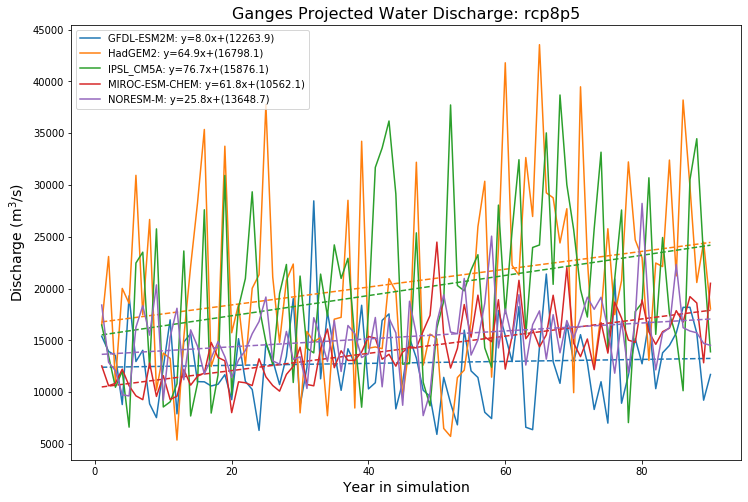

In [11]:
fig, axs = plt.subplots(figsize = (12, 8))

plt.plot(years, gfdl_qw_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M: y=8.0x+(12263.9)')
pylab.plot(years,p_gfdl(years), color = 'tab:blue', linestyle = 'dashed')

plt.plot(years, hadgem_qw_mean_rows, color = 'tab:orange', label = 'HadGEM2: y=64.9x+(16798.1)')
pylab.plot(years,p_hadgem(years), color = 'tab:orange', linestyle = 'dashed' )

plt.plot(years, ipsl_qw_mean_rows, color = 'tab:green', label = 'IPSL_CM5A: y=76.7x+(15876.1)')
pylab.plot(years,p_ipsl(years), color = 'tab:green', linestyle = 'dashed')

plt.plot(years, miroc_qw_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM: y=61.8x+(10562.1)')
pylab.plot(years,p_miroc(years), color = 'tab:red', linestyle = 'dashed')

plt.plot(years, noresm_qw_mean_rows, color = 'tab:purple', label = 'NORESM-M: y=25.8x+(13648.7)')
pylab.plot(years,p_noresm(years), color = 'tab:purple', linestyle = 'dashed')

plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Ganges Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/ganga_qw_rcp8p5_trend_color.png')

### 1.3d) B&W plot with NO trendlines

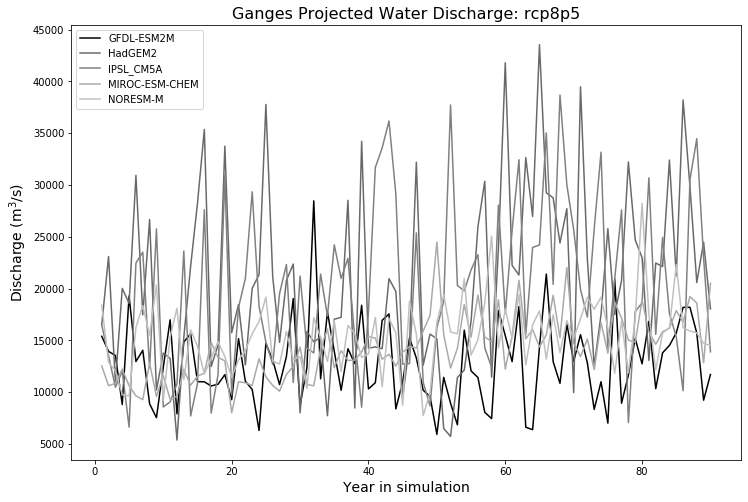

In [12]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'black', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qw_mean_rows, color = 'dimgray', label = 'HadGEM2')
plt.plot(years, ipsl_qw_mean_rows, color = 'gray', label = 'IPSL_CM5A')
plt.plot(years, miroc_qw_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qw_mean_rows, color = 'silver', label = 'NORESM-M')
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Ganges Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/ganga_qw_rcp8p5_notrend_bw.png')

### 1.3e) B&W plot WITH trendlines

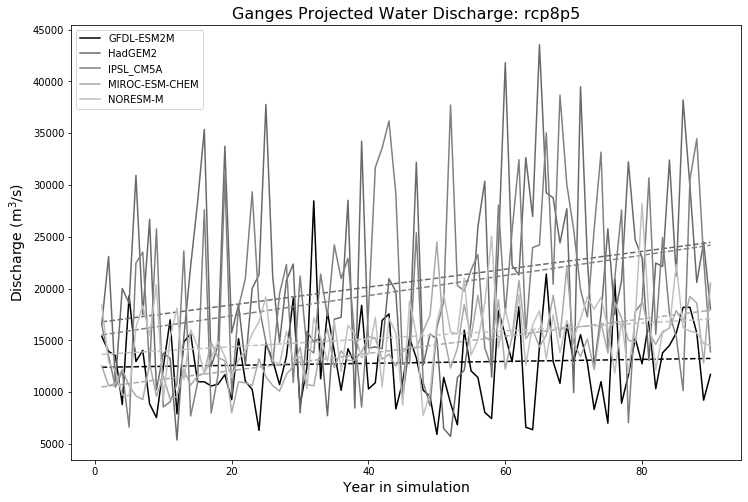

In [13]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'black', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'black', linestyle = 'dashed')

plt.plot(years, hadgem_qw_mean_rows, color = 'dimgray', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'dimgray', linestyle = 'dashed' )

plt.plot(years, ipsl_qw_mean_rows, color = 'gray', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'gray', linestyle = 'dashed')

plt.plot(years, miroc_qw_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'darkgray', linestyle = 'dashed')

plt.plot(years, noresm_qw_mean_rows, color = 'silver', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'silver', linestyle = 'dashed')

plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Ganges Projected Water Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/ganga_qw_rcp8p5_trend_bw.png')

## 1.4. Reshape Qs arrays

In [14]:
# 90 rows by 365 columns = 90 years of output data
gfdl_qs = np.array(gfdl['Qs(kg/s)'])
gfdl_qs_reshape = gfdl_qs.reshape(90,365)
gfdl_qs_mean_rows = np.mean(gfdl_qs_reshape, axis = 1)

hadgem_qs = np.array(hadgem['Qs(kg/s)'])
hadgem_qs_reshape = hadgem_qs.reshape(90,365)
hadgem_qs_mean_rows = np.mean(hadgem_qs_reshape, axis = 1)

ipsl_qs = np.array(ipsl['Qs(kg/s)'])
ipsl_qs_reshape = ipsl_qs.reshape(90,365)
ipsl_qs_mean_rows = np.mean(ipsl_qs_reshape, axis = 1)

miroc_qs = np.array(miroc['Qs(kg/s)'])
miroc_qs_reshape = miroc_qs.reshape(90,365)
miroc_qs_mean_rows = np.mean(miroc_qs_reshape, axis = 1)

noresm_qs = np.array(noresm['Qs(kg/s)'])
noresm_qs_reshape = noresm_qs.reshape(90,365)
noresm_qs_mean_rows = np.mean(noresm_qs_reshape, axis = 1)

## 1.5. Plot Qs outputs
### 1.5a) Color plot with NO trendlines

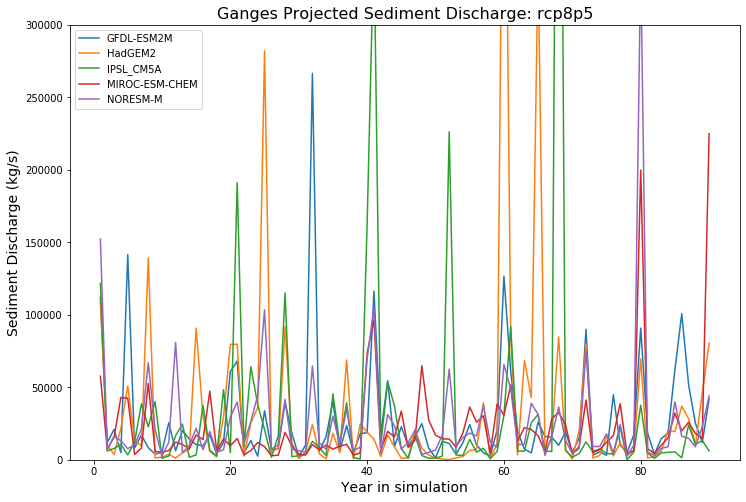

In [15]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2')
plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M')
plt.ylim(0, 3e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Ganges Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/ganga_qs_rcp8p5_notrend_color.png')

### 1.5b) Calculate trendlines

In [16]:
# calc the trendline for gfdl
z_gfdl = np.polyfit(years, gfdl_qs_mean_rows, 1)
p_gfdl = np.poly1d(z_gfdl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_gfdl[0],z_gfdl[1]), '(GFDL-ESM2M)')

# calc the trendline for hadgem
z_hadgem = np.polyfit(years, hadgem_qs_mean_rows, 1)
p_hadgem = np.poly1d(z_hadgem)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_hadgem[0],z_hadgem[1]), '(HadGEM2)')

# calc the trendline for ipsl
z_ipsl = np.polyfit(years, ipsl_qs_mean_rows, 1)
p_ipsl = np.poly1d(z_ipsl)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_ipsl[0],z_ipsl[1]), '(IPSL_CM5A)')

# calc the trendline for miroc
z_miroc = np.polyfit(years, miroc_qs_mean_rows, 1)
p_miroc = np.poly1d(z_miroc)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_miroc[0],z_miroc[1]), '(MIROC-ESM-CHEM)')

# calc the trendline for noresm
z_noresm = np.polyfit(years, noresm_qs_mean_rows, 1)
p_noresm = np.poly1d(z_noresm)
# the line equation:
print("y=%.1fx+(%.1f)"%(z_noresm[0],z_noresm[1]), '(NORESM-M)')

y=3.3x+(27074.1) (GFDL-ESM2M)
y=60.3x+(32246.6) (HadGEM2)
y=0.1x+(34323.3) (IPSL_CM5A)
y=270.2x+(10702.5) (MIROC-ESM-CHEM)
y=32.6x+(25607.6) (NORESM-M)


### 1.5c) Color plot WITH trendlines

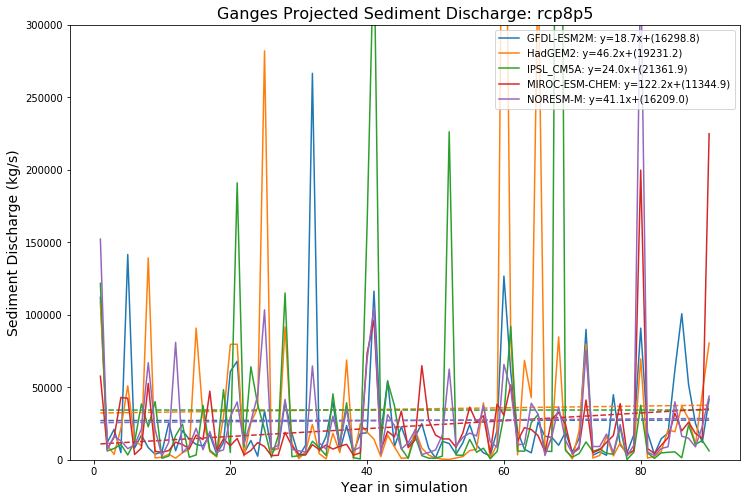

In [17]:
fig, axs = plt.subplots(figsize = (12, 8))

plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M: y=18.7x+(16298.8)')
pylab.plot(years,p_gfdl(years), color = 'tab:blue', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2: y=46.2x+(19231.2)')
pylab.plot(years,p_hadgem(years), color = 'tab:orange', linestyle = 'dashed' )

plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A: y=24.0x+(21361.9)')
pylab.plot(years,p_ipsl(years), color = 'tab:green', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM: y=122.2x+(11344.9)')
pylab.plot(years,p_miroc(years), color = 'tab:red', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M: y=41.1x+(16209.0)')
pylab.plot(years,p_noresm(years), color = 'tab:purple', linestyle = 'dashed')

plt.ylim(0, 3e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Ganges Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/ganga_qs_rcp8p5_trend_color.png')

### 1.5d) B&W plot with NO trendlines

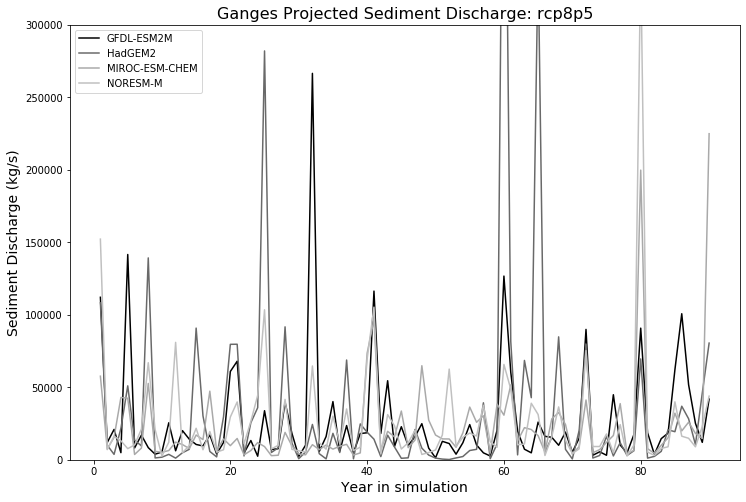

In [18]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
#plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
plt.ylim(0, 3e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Ganges Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/ganga_qs_rcp8p5_notrend_bw.png')

### 1.5e) B&W plot WITH trendlines

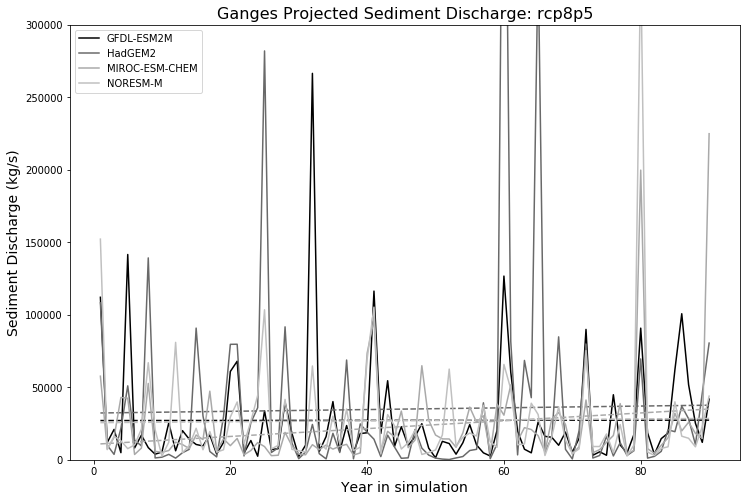

In [19]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'black', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'dimgray', linestyle = 'dashed' )

#plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
#pylab.plot(years,p_ipsl(years), color = 'gray', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'darkgray', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'silver', linestyle = 'dashed')

plt.ylim(0, 3e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Ganges Projected Sediment Discharge: rcp8p5', size = 16)
plt.legend()
plt.show()

fig.tight_layout()
fig.savefig('../../figures/v2/projections/ganga_qs_rcp8p5_trend_bw.png')

# Part 2: Calculate average water and sediment discharge and annual sediment discharge for each time period

## 2.1. Import Summary Statistics

### 2.1a) GFDL-ESM2M

In [20]:
gfdl_2000 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/reference/GFDL-ESM2M/summ_stats_v3.csv', dtype=float))
gfdl_2020 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/2020/summ_stats_v3.csv', dtype=float))
gfdl_2040 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/2040/summ_stats_v3.csv', dtype=float))
gfdl_2060 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/2060/summ_stats_v3.csv', dtype=float))
gfdl_2080 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/2080/summ_stats_v3.csv', dtype=float))

frames_gfdl = [gfdl_2000, gfdl_2020, gfdl_2040, gfdl_2060, gfdl_2080]
concat_gfdl = pd.concat(frames_gfdl)
concat_gfdl.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [21]:
gfdl_change = ((gfdl_2080 - gfdl_2000)/gfdl_2000)*100
concat_gfdl = concat_gfdl.append(gfdl_change)
concat_gfdl.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,13017.69804,22684.61032,0.39387,273.21814,123409.00592,3.043041e+06,31.75275,2590.13378,20544.22617,...,1848.46506,16.66089,0.01056,38.79597,46181.21683,45710.13590,0.96173,969.26095,220.00000,217.00000
0,2020,12279.81610,23168.89241,0.37669,257.73132,140907.08798,4.775206e+06,36.11035,2957.38716,20009.31199,...,1674.09406,14.03451,0.00990,35.13623,42976.18399,40936.45577,0.95642,901.99305,220.00000,214.00000
0,2040,13070.06691,24584.36050,0.36813,274.31727,156104.83943,6.217127e+06,40.25397,3276.36071,21673.31664,...,1941.27945,17.25813,0.01111,40.74398,45034.77304,38616.44041,0.83469,945.19915,210.00000,156.00000
0,2060,12244.94187,24934.75832,0.40818,256.99938,131276.87215,4.351429e+06,43.94110,2755.26619,20523.34745,...,1797.70690,19.20497,0.01308,37.73064,43354.36141,41811.57773,0.94620,909.93032,185.00000,212.00000
0,2080,13393.30110,27275.63171,0.39271,281.10138,176431.79947,4.501746e+06,41.37708,3702.98716,23464.62374,...,1627.99486,16.92344,0.01170,34.16869,46181.52085,43291.68875,0.92247,969.26733,196.00000,195.00000
0,NaN,2.88533,20.23848,-0.29474,2.88533,42.96509,4.793578e+01,30.31021,42.96509,14.21517,...,-11.92720,1.57583,10.82241,-11.92720,0.00066,-5.29083,-4.08184,0.00066,-10.90909,-10.13825


### 2.1b) HadGEM2

In [22]:
hadgem_2000 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/reference/HadGEM2/summ_stats_v3.csv', dtype=float))
hadgem_2020 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/HadGEM2/2020/summ_stats_v3.csv', dtype=float))
hadgem_2040 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/HadGEM2/2040/summ_stats_v3.csv', dtype=float))
hadgem_2060 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/HadGEM2/2060/summ_stats_v3.csv', dtype=float))
hadgem_2080 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/HadGEM2/2080/summ_stats_v3.csv', dtype=float))

frames_hadgem = [hadgem_2000, hadgem_2020, hadgem_2040, hadgem_2060, hadgem_2080]
concat_hadgem = pd.concat(frames_hadgem)
concat_hadgem.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [23]:
hadgem_change = ((hadgem_2080 - hadgem_2000)/hadgem_2000)*100
concat_hadgem = concat_hadgem.append(hadgem_change)
concat_hadgem.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,12923.84757,22445.04792,0.21689,271.24839,245588.56054,6.467623e+06,26.61678,5154.46359,27723.75624,...,1178.05960,2.31913,0.00209,24.72536,45393.76494,16129.21611,0.35205,952.73374,227.00000,189.00000
0,2020,19411.91786,28264.05108,0.23363,407.42135,271331.15371,3.463681e+06,18.59618,5694.75447,38729.43897,...,1296.82633,2.32602,0.00191,27.21806,74535.25650,34034.98300,0.44234,1564.36141,255.00000,261.00000
0,2040,17971.67556,28436.66368,0.24409,377.19325,258752.20084,9.473641e+06,36.61280,5430.74480,33740.10391,...,1434.25565,3.13356,0.00231,30.10245,68634.62175,31324.57694,0.44963,1440.51766,205.00000,260.00000
0,2060,20668.82011,32326.90442,0.21658,433.80148,351932.04759,1.016975e+07,45.50684,7386.42273,40829.82476,...,1497.80791,2.25571,0.00169,31.43630,75732.01069,23160.71459,0.31278,1589.47913,226.00000,270.00000
0,2080,24852.57290,37390.22276,0.23583,521.61095,354572.50174,9.677813e+06,29.93798,7441.84113,45736.05951,...,1551.61516,2.98181,0.00226,32.56562,95012.32649,32600.19613,0.36029,1994.13839,218.00000,259.00000
0,NaN,92.30011,66.58562,8.73155,92.30011,44.37664,4.963477e+01,12.47785,44.37664,64.97065,...,31.70939,28.57425,8.03362,31.70939,109.30700,102.11891,2.34201,109.30700,-3.96476,37.03704


### 2.1c) IPSL_CM5A

In [24]:
ipsl_2000 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/reference/IPSL_CM5A/summ_stats_v3.csv', dtype=float))
ipsl_2020 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/IPSL_CM5A/2020/summ_stats_v3.csv', dtype=float))
ipsl_2040 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/IPSL_CM5A/2040/summ_stats_v3.csv', dtype=float))
ipsl_2060 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/IPSL_CM5A/2060/summ_stats_v3.csv', dtype=float))
ipsl_2080 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/IPSL_CM5A/2080/summ_stats_v3.csv', dtype=float))

frames_ipsl = [ipsl_2000, ipsl_2020, ipsl_2040, ipsl_2060, ipsl_2080]
concat_ipsl = pd.concat(frames_ipsl)
concat_ipsl.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [25]:
ipsl_change = ((ipsl_2080 - ipsl_2000)/ipsl_2000)*100
concat_ipsl = concat_ipsl.append(ipsl_change)
concat_ipsl.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,14399.11618,24019.70993,0.12324,302.21163,391012.67916,2.118525e+07,60.67803,8206.65512,36428.18037,...,1766.73375,1.69385,0.00109,37.08057,43057.15231,4912.07258,0.10831,903.69243,216.00000,217.00000
0,2020,16281.49792,26726.59788,0.23577,341.71945,348475.59168,4.552015e+06,32.48084,7313.87791,36571.69296,...,2024.29544,8.14987,0.00449,42.48633,52586.05316,22589.69079,0.42217,1103.68698,218.00000,212.00000
0,2040,19343.45075,30625.79390,0.20578,405.98435,336498.27568,1.008075e+07,45.68135,7062.49553,41594.86238,...,2072.73074,4.06571,0.00233,43.50290,66993.50503,18185.00826,0.25295,1406.07356,216.00000,212.00000
0,2060,23447.33642,35766.50135,0.21085,492.11755,446421.97310,1.346347e+07,49.41783,9369.59686,47243.31806,...,1903.69984,3.77795,0.00213,39.95525,87352.99659,22183.92210,0.25837,1833.38279,215.00000,212.00000
0,2080,22993.23777,37827.62185,0.17097,482.58684,445979.91729,3.570136e+07,80.05150,9360.31890,45671.64497,...,1592.47108,3.19064,0.00199,33.42311,87971.94154,19615.55436,0.22025,1846.37334,215.00000,170.00000
0,NaN,59.68506,57.48576,38.72222,59.68506,14.05766,6.851991e+01,31.92832,14.05766,25.37449,...,-9.86355,88.36630,81.56610,-9.86355,104.31435,299.33356,103.35728,104.31435,-0.46296,-21.65899


### 2.1d) MIROC-ESM-CHEM

In [26]:
miroc_2000 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/reference/MIROC-ESM-CHEM/summ_stats_v3.csv', dtype=float))
miroc_2020 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/2020/summ_stats_v3.csv', dtype=float))
miroc_2040 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/2040/summ_stats_v3.csv', dtype=float))
miroc_2060 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/2060/summ_stats_v3.csv', dtype=float))
miroc_2080 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/2080/summ_stats_v3.csv', dtype=float))

frames_miroc = [miroc_2000, miroc_2020, miroc_2040, miroc_2060, miroc_2080]
concat_miroc = pd.concat(frames_miroc)
concat_miroc.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [27]:
miroc_change = ((miroc_2080 - miroc_2000)/miroc_2000)*100
concat_miroc = concat_miroc.append(miroc_change)
concat_miroc.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,11315.39171,21251.52567,0.42238,237.48979,109562.83023,2.230762e+06,26.95456,2299.52738,18204.50788,...,1508.86359,14.88679,0.01108,31.66834,40794.92699,51141.02278,1.23930,856.21238,227.00000,228.00000
0,2020,11311.64100,22345.71742,0.38777,237.41106,120633.44387,8.241789e+06,74.03975,2531.87971,18377.49976,...,1727.73869,15.11583,0.01047,36.26214,39787.30142,36565.94950,0.89357,835.06413,213.00000,234.00000
0,2040,13450.12094,25189.84519,0.28126,282.29392,193635.71182,9.113202e+06,53.56007,4064.06644,23158.40642,...,1729.83419,7.95934,0.00563,36.30612,46478.81187,23141.80122,0.51098,975.50693,208.00000,246.00000
0,2060,16011.82492,28875.05056,0.38045,336.05950,228509.02368,4.686086e+06,34.14925,4795.99473,27784.58056,...,1833.55949,15.12162,0.00972,38.48313,55183.88151,56566.06119,0.99848,1158.21074,208.00000,234.00000
0,2080,16429.30179,31081.25505,0.37482,344.82159,178851.33951,8.984470e+06,58.95141,3753.76897,26990.61370,...,1741.34511,12.93567,0.00847,36.54771,58892.17877,47056.51387,0.81294,1236.04125,223.00000,238.00000
0,NaN,45.19428,46.25423,-11.26090,45.19428,63.24089,3.027534e+02,118.70663,63.24089,48.26335,...,15.40772,-13.10634,-23.55721,15.40772,44.36153,-7.98676,-34.40342,44.36153,-1.76211,4.38596


### 2.1e) NORESM-M

In [28]:
noresm_2000 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/reference/NORESM-M/summ_stats_v3.csv', dtype=float))
noresm_2020 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/NORESM-M/2020/summ_stats_v3.csv', dtype=float))
noresm_2040 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/NORESM-M/2040/summ_stats_v3.csv', dtype=float))
noresm_2060 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/NORESM-M/2060/summ_stats_v3.csv', dtype=float))
noresm_2080 = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/rcp8p5/NORESM-M/2080/summ_stats_v3.csv', dtype=float))

frames_noresm = [noresm_2000, noresm_2020, noresm_2040, noresm_2060, noresm_2080]
concat_noresm = pd.concat(frames_noresm)
concat_noresm.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [29]:
noresm_change = ((noresm_2080 - noresm_2000)/noresm_2000)*100
concat_noresm = concat_noresm.append(noresm_change)
concat_noresm.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,12311.47649,22004.11557,0.38927,258.39582,128654.55820,2.767671e+06,32.47280,2700.22852,19853.27845,...,1589.82729,12.12035,0.00882,33.36762,46111.92662,46554.64341,1.02556,967.80667,228.00000,217.00000
0,2020,14312.32677,24461.80525,0.35710,300.39008,126626.43687,3.778864e+06,35.09167,2657.66189,23404.89839,...,1797.06902,12.12829,0.00782,37.71726,52020.53656,43858.57127,0.83630,1091.81780,215.00000,207.00000
0,2040,14274.34922,25460.00938,0.39903,299.59300,125986.01516,2.723071e+06,22.49455,2644.22059,23233.84481,...,1784.85553,13.40867,0.00888,37.46092,53315.48406,54649.60760,1.00960,1118.99643,220.00000,217.00000
0,2060,15754.58645,27648.06684,0.38988,330.66052,151669.61814,3.225297e+06,26.68425,3183.27337,25815.20516,...,2012.65925,17.04425,0.01034,42.24211,58491.37335,54355.49196,0.92157,1227.62906,215.00000,212.00000
0,2080,16488.30700,29706.86543,0.33474,346.06000,168576.55603,8.834755e+06,54.53042,3538.11968,27449.40275,...,1912.15593,9.90088,0.00631,40.13272,60470.99453,42161.30735,0.69412,1269.17776,214.00000,187.00000
0,NaN,33.92632,35.00595,-14.00713,33.92632,31.03038,2.192126e+02,67.92642,31.03038,38.26131,...,20.27444,-18.31191,-28.42406,20.27444,31.13960,-9.43694,-32.31824,31.13960,-6.14035,-13.82488


***Important Note***

Before moving on, check that the data in the summary statistics tables in 2.1 a-e) seem adequate. Values with an exponent of >100 are not accurate, and HydroTrend must be re-run for that specific model run. Do this via the terminal by navigating to the project folder/repository (ht_gbmd), then:

> conda activate pymt

> python setup/run_2/Brahmaputra/rcp4p5/HadGEM2/2060/run_HT_v2.py (or whichever run seems erroneous)

Then clear the kernel and re-run this notebook. See if the error subsided. 

This problem occurs due to a wrapping error in HydroTrend, which requires developer input to fix, which is beyond the scope of this project. You may need to re-run the model several times.

## 2.2. Calculate average Qw (m^3/s), Qs (kg/s), SSC (mg/l), and Qs (MT/yr)

### 2.2a) Average water discharge (over all climate models for each time period)

In [30]:
avg_qw_ref = np.mean([gfdl_2000['Mean Qw'].to_numpy(), hadgem_2000['Mean Qw'].to_numpy(), ipsl_2000['Mean Qw'].to_numpy(), miroc_2000['Mean Qw'].to_numpy(), noresm_2000['Mean Qw'].to_numpy()])
avg_qw_2020 = np.mean([gfdl_2020['Mean Qw'].to_numpy(), hadgem_2020['Mean Qw'].to_numpy(), ipsl_2020['Mean Qw'].to_numpy(), miroc_2020['Mean Qw'].to_numpy(), noresm_2020['Mean Qw'].to_numpy()])
avg_qw_2040 = np.mean([gfdl_2040['Mean Qw'].to_numpy(), hadgem_2040['Mean Qw'].to_numpy(), ipsl_2040['Mean Qw'].to_numpy(), miroc_2040['Mean Qw'].to_numpy(), noresm_2040['Mean Qw'].to_numpy()])
avg_qw_2060 = np.mean([gfdl_2060['Mean Qw'].to_numpy(), hadgem_2060['Mean Qw'].to_numpy(), ipsl_2060['Mean Qw'].to_numpy(), miroc_2060['Mean Qw'].to_numpy(), noresm_2060['Mean Qw'].to_numpy()])
avg_qw_2080 = np.mean([gfdl_2080['Mean Qw'].to_numpy(), hadgem_2080['Mean Qw'].to_numpy(), ipsl_2080['Mean Qw'].to_numpy(), miroc_2080['Mean Qw'].to_numpy(), noresm_2080['Mean Qw'].to_numpy()])

In [31]:
print('2000 Avg. Qw (m^3/s): {:.6}'.format(avg_qw_ref))
print('2020 Avg. Qw (m^3/s): {:.6}'.format(avg_qw_2020))
print('2040 Avg. Qw (m^3/s): {:.6}'.format(avg_qw_2040))
print('2060 Avg. Qw (m^3/s): {:.6}'.format(avg_qw_2060))
print('2080 Avg. Qw (m^3/s): {:.6}'.format(avg_qw_2080))

2000 Avg. Qw (m^3/s): 12793.5
2020 Avg. Qw (m^3/s): 14719.4
2040 Avg. Qw (m^3/s): 15621.9
2060 Avg. Qw (m^3/s): 17625.5
2080 Avg. Qw (m^3/s): 18831.3


### 2.2b) Average sediment discharge (kg/s)

In [32]:
avg_qs_ref = np.mean([gfdl_2000['Mean Qs'].to_numpy(), hadgem_2000['Mean Qs'].to_numpy(), ipsl_2000['Mean Qs'].to_numpy(), miroc_2000['Mean Qs'].to_numpy(), noresm_2000['Mean Qs'].to_numpy()])
avg_qs_2020 = np.mean([gfdl_2020['Mean Qs'].to_numpy(), hadgem_2020['Mean Qs'].to_numpy(), ipsl_2020['Mean Qs'].to_numpy(), miroc_2020['Mean Qs'].to_numpy(), noresm_2020['Mean Qs'].to_numpy()])
avg_qs_2040 = np.mean([gfdl_2040['Mean Qs'].to_numpy(), hadgem_2040['Mean Qs'].to_numpy(), ipsl_2040['Mean Qs'].to_numpy(), miroc_2040['Mean Qs'].to_numpy(), noresm_2040['Mean Qs'].to_numpy()])
avg_qs_2060 = np.mean([gfdl_2060['Mean Qs'].to_numpy(), hadgem_2060['Mean Qs'].to_numpy(), ipsl_2060['Mean Qs'].to_numpy(), miroc_2060['Mean Qs'].to_numpy(), noresm_2060['Mean Qs'].to_numpy()])
avg_qs_2080 = np.mean([gfdl_2080['Mean Qs'].to_numpy(), hadgem_2080['Mean Qs'].to_numpy(), ipsl_2080['Mean Qs'].to_numpy(), miroc_2080['Mean Qs'].to_numpy(), noresm_2080['Mean Qs'].to_numpy()])

In [33]:
print('2000 Avg. Qs (kg/s): {:.6}'.format(avg_qs_ref))
print('2020 Avg. Qs (kg/s): {:.6}'.format(avg_qs_2020))
print('2040 Avg. Qs (kg/s): {:.6}'.format(avg_qs_2040))
print('2060 Avg. Qs (kg/s): {:.6}'.format(avg_qs_2060))
print('2080 Avg. Qs (kg/s): {:.6}'.format(avg_qs_2080))

2000 Avg. Qs (kg/s): 22481.0
2020 Avg. Qs (kg/s): 24993.4
2040 Avg. Qs (kg/s): 26859.3
2060 Avg. Qs (kg/s): 29910.3
2080 Avg. Qs (kg/s): 32656.3


### 2.2c) Average SSC (mg/l)

In [34]:
avg_SSC_ref = np.mean([gfdl_2000['Mean SSC'].to_numpy(), hadgem_2000['Mean SSC'].to_numpy(), ipsl_2000['Mean SSC'].to_numpy(), miroc_2000['Mean SSC'].to_numpy(), noresm_2000['Mean SSC'].to_numpy()])
avg_SSC_2020 = np.mean([gfdl_2020['Mean SSC'].to_numpy(), hadgem_2020['Mean SSC'].to_numpy(), ipsl_2020['Mean SSC'].to_numpy(), miroc_2020['Mean SSC'].to_numpy(), noresm_2020['Mean SSC'].to_numpy()])
avg_SSC_2040 = np.mean([gfdl_2040['Mean SSC'].to_numpy(), hadgem_2040['Mean SSC'].to_numpy(), ipsl_2040['Mean SSC'].to_numpy(), miroc_2040['Mean SSC'].to_numpy(), noresm_2040['Mean SSC'].to_numpy()])
avg_SSC_2060 = np.mean([gfdl_2060['Mean SSC'].to_numpy(), hadgem_2060['Mean SSC'].to_numpy(), ipsl_2060['Mean SSC'].to_numpy(), miroc_2060['Mean SSC'].to_numpy(), noresm_2060['Mean SSC'].to_numpy()])
avg_SSC_2080 = np.mean([gfdl_2080['Mean SSC'].to_numpy(), hadgem_2080['Mean SSC'].to_numpy(), ipsl_2080['Mean SSC'].to_numpy(), miroc_2080['Mean SSC'].to_numpy(), noresm_2080['Mean SSC'].to_numpy()])

In [35]:
print('2000 Avg. SSC (mg/l): {:.3}'.format(avg_SSC_ref))
print('2020 Avg. SSC (mg/l): {:.3}'.format(avg_SSC_2020))
print('2040 Avg. SSC (mg/l): {:.3}'.format(avg_SSC_2040))
print('2060 Avg. SSC (mg/l): {:.3}'.format(avg_SSC_2060))
print('2080 Avg. SSC (mg/l): {:.3}'.format(avg_SSC_2080))

2000 Avg. SSC (mg/l): 0.309
2020 Avg. SSC (mg/l): 0.318
2040 Avg. SSC (mg/l): 0.3
2060 Avg. SSC (mg/l): 0.321
2080 Avg. SSC (mg/l): 0.302


### 2.2d) Annual average sediment discharge (MT/yr)

In [36]:
print('2000 Avg. Qs (MT/yr): {:.4}'.format(avg_qs_ref*3.14e7/1e9))
print('2020 Avg. Qs (MT/yr): {:.4}'.format(avg_qs_2020*3.14e7/1e9))
print('2040 Avg. Qs (MT/yr): {:.4}'.format(avg_qs_2040*3.14e7/1e9))
print('2060 Avg. Qs (MT/yr): {:.4}'.format(avg_qs_2060*3.14e7/1e9))
print('2080 Avg. Qs (MT/yr): {:.5}'.format(avg_qs_2080*3.14e7/1e9))

2000 Avg. Qs (MT/yr): 705.9
2020 Avg. Qs (MT/yr): 784.8
2040 Avg. Qs (MT/yr): 843.4
2060 Avg. Qs (MT/yr): 939.2
2080 Avg. Qs (MT/yr): 1025.4


# Part 3: Compare and contrast sediment discharge values calculated via different methods**

## 3.1. Method 1: Sum method (manual averaging)

In [37]:
# sum all the outputs and divide by the number of outputs
gfdl_qs_kgs_20 = gfdl['Qs(kg/s)'][0:10950].sum()/10950
gfdl_qs_kgs_40 = gfdl['Qs(kg/s)'][7300:18250].sum()/10950
gfdl_qs_kgs_60 = gfdl['Qs(kg/s)'][14600:25550].sum()/10950
gfdl_qs_kgs_80 = gfdl['Qs(kg/s)'][21900:].sum()/10950

hadgem_qs_kgs_20 = hadgem['Qs(kg/s)'][0:10950].sum()/10950
hadgem_qs_kgs_40 = hadgem['Qs(kg/s)'][7300:18250].sum()/10950
hadgem_qs_kgs_60 = hadgem['Qs(kg/s)'][14600:25550].sum()/10950
hadgem_qs_kgs_80 = hadgem['Qs(kg/s)'][21900:].sum()/10950

ipsl_qs_kgs_20 = ipsl['Qs(kg/s)'][0:10950].sum()/10950
ipsl_qs_kgs_40 = ipsl['Qs(kg/s)'][7300:18250].sum()/10950
ipsl_qs_kgs_60 = ipsl['Qs(kg/s)'][14600:25550].sum()/10950
ipsl_qs_kgs_80 = ipsl['Qs(kg/s)'][21900:].sum()/10950

miroc_qs_kgs_20 = miroc['Qs(kg/s)'][0:10950].sum()/10950
miroc_qs_kgs_40 = miroc['Qs(kg/s)'][7300:18250].sum()/10950
miroc_qs_kgs_60 = miroc['Qs(kg/s)'][14600:25550].sum()/10950
miroc_qs_kgs_80 = miroc['Qs(kg/s)'][21900:].sum()/10950

noresm_qs_kgs_20 = noresm['Qs(kg/s)'][0:10950].sum()/10950
noresm_qs_kgs_40 = noresm['Qs(kg/s)'][7300:18250].sum()/10950
noresm_qs_kgs_60 = noresm['Qs(kg/s)'][14600:25550].sum()/10950
noresm_qs_kgs_80 = noresm['Qs(kg/s)'][21900:].sum()/10950

In [38]:
# convert averages from kg/s to mt/yr
gfdl_qs_mtyr_20 = gfdl_qs_kgs_20*3.14e7/1e9
gfdl_qs_mtyr_40 = gfdl_qs_kgs_40*3.14e7/1e9
gfdl_qs_mtyr_60 = gfdl_qs_kgs_60*3.14e7/1e9
gfdl_qs_mtyr_80 = gfdl_qs_kgs_80*3.14e7/1e9

hadgem_qs_mtyr_20 = hadgem_qs_kgs_20*3.14e7/1e9
hadgem_qs_mtyr_40 = hadgem_qs_kgs_40*3.14e7/1e9
hadgem_qs_mtyr_60 = hadgem_qs_kgs_60*3.14e7/1e9
hadgem_qs_mtyr_80 = hadgem_qs_kgs_80*3.14e7/1e9

ipsl_qs_mtyr_20 = ipsl_qs_kgs_20*3.14e7/1e9
ipsl_qs_mtyr_40 = ipsl_qs_kgs_40*3.14e7/1e9
ipsl_qs_mtyr_60 = ipsl_qs_kgs_60*3.14e7/1e9
ipsl_qs_mtyr_80 = ipsl_qs_kgs_80*3.14e7/1e9

miroc_qs_mtyr_20 = miroc_qs_kgs_20*3.14e7/1e9
miroc_qs_mtyr_40 = miroc_qs_kgs_40*3.14e7/1e9
miroc_qs_mtyr_60 = miroc_qs_kgs_60*3.14e7/1e9
miroc_qs_mtyr_80 = miroc_qs_kgs_80*3.14e7/1e9

noresm_qs_mtyr_20 = noresm_qs_kgs_20*3.14e7/1e9
noresm_qs_mtyr_40 = noresm_qs_kgs_40*3.14e7/1e9
noresm_qs_mtyr_60 = noresm_qs_kgs_60*3.14e7/1e9
noresm_qs_mtyr_80 = noresm_qs_kgs_80*3.14e7/1e9

In [39]:
print('Annual sediment discharge using sum method (MT/yr):')
print('GFDL: {:.5} (2020), {:.5} (2040), {:.5} (2060), {:.5} (2080)'.format(gfdl_qs_mtyr_20, gfdl_qs_mtyr_40, gfdl_qs_mtyr_60, gfdl_qs_mtyr_80))
print('HadGEM: {:.5} (2020), {:.5} (2040), {:.5} (2060), {:.5} (2080)'.format(hadgem_qs_mtyr_20, hadgem_qs_mtyr_40, hadgem_qs_mtyr_60, hadgem_qs_mtyr_80))
print('IPSL: {:.5} (2020), {:.5} (2040), {:.5} (2060), {:.5} (2080)'.format(ipsl_qs_mtyr_20, ipsl_qs_mtyr_40, ipsl_qs_mtyr_60, ipsl_qs_mtyr_80))
print('MIROC: {:.5} (2020), {:.5} (2040), {:.5} (2060), {:.5} (2080)'.format(miroc_qs_mtyr_20, miroc_qs_mtyr_40, miroc_qs_mtyr_60, miroc_qs_mtyr_80))
print('NORESM: {:.5} (2020), {:.5} (2040), {:.5} (2060), {:.5} (2080)'.format(noresm_qs_mtyr_20, noresm_qs_mtyr_40, noresm_qs_mtyr_60, noresm_qs_mtyr_80))

Annual sediment discharge using sum method (MT/yr):
GFDL: 745.32 (2020), 930.03 (2040), 726.79 (2060), 856.45 (2080)
HadGEM: 1212.8 (2020), 829.53 (2040), 1416.9 (2060), 1174.1 (2080)
IPSL: 915.61 (2020), 1299.5 (2040), 1828.2 (2060), 1187.8 (2080)
MIROC: 493.18 (2020), 552.4 (2040), 779.78 (2060), 975.95 (2080)
NORESM: 852.18 (2020), 802.73 (2040), 728.92 (2060), 932.8 (2080)


In [40]:
print('Average annual sediment discharge over all climate models (MT/yr):')
print('2020: {:.5}'.format((gfdl_qs_mtyr_20 + hadgem_qs_mtyr_20 + miroc_qs_mtyr_20 + noresm_qs_mtyr_20)/4))
print('2040: {:.5}'.format((gfdl_qs_mtyr_40 + hadgem_qs_mtyr_40 + miroc_qs_mtyr_40 + noresm_qs_mtyr_40)/4))
print('2060: {:.5}'.format((gfdl_qs_mtyr_60 + hadgem_qs_mtyr_60 + miroc_qs_mtyr_60 + noresm_qs_mtyr_60)/4))
print('2080: {:.5}'.format((gfdl_qs_mtyr_80 + hadgem_qs_mtyr_80 + miroc_qs_mtyr_80 + noresm_qs_mtyr_80)/4))

Average annual sediment discharge over all climate models (MT/yr):
2020: 825.88
2040: 778.67
2060: 913.1
2080: 984.81
